## Project: Nike US Sales Data Analysis
### The objective of this project is to analyse synthetic Nike US Sales dataset in 2 parts:
1. Exploratory Data Analysis (EDA) on Python
2. Dashboarding on PowerBI

### Let's first import the relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Load Data

In [2]:
sales = pd.read_csv('./datasets/nike_dataset.csv')

### 1.1 Preview Data

In [3]:
sales.head()

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,01-01-2020,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,02-01-2020,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,03-01-2020,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,04-01-2020,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,05-01-2020,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90


In [4]:
print(f'There are {sales.shape[0]} rows and {sales.shape[1]} columns.')

There are 9360 rows and 9 columns.


### 1.2 Datatypes

In [5]:
sales.dtypes

Invoice Date      object
Product           object
Region            object
Retailer          object
Sales Method      object
State             object
Price per Unit     int64
Total Sales        int64
Units Sold         int64
dtype: object

In [6]:
#transform invoice column to datetime datatype
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'], format='%d-%m-%Y')

In [7]:
#validate the change
sales.dtypes

Invoice Date      datetime64[ns]
Product                   object
Region                    object
Retailer                  object
Sales Method              object
State                     object
Price per Unit             int64
Total Sales                int64
Units Sold                 int64
dtype: object

### 1.3 Check for missing values

In [8]:
sales.isna().sum()

Invoice Date      0
Product           0
Region            0
Retailer          0
Sales Method      0
State             0
Price per Unit    0
Total Sales       0
Units Sold        0
dtype: int64

### 1.4 Check for duplicates

In [9]:
sales.duplicated().sum()

np.int64(0)

### 1.5 Check for unique values

In [10]:
sales.nunique()

Invoice Date      724
Product             6
Region              5
Retailer            6
Sales Method        3
State              48
Price per Unit     94
Total Sales       550
Units Sold         89
dtype: int64

### 1.6 Descriptive Statistics

In [11]:
sales.describe()

,Invoice Date,Price per Unit,Total Sales,Units Sold
count,9360,9360.000000,9360.00000,9360.000000
mean,2021-05-09 08:01:59.999999744,44.739209,921.93109,25.852991
min,2020-01-01 00:00:00,7.000000,0.00000,0.000000
25%,2021-02-15 00:00:00,35.000000,42.00000,11.000000
50%,2021-06-03 00:00:00,45.000000,95.00000,18.000000
75%,2021-09-16 00:00:00,55.000000,1463.00000,35.000000
max,2021-12-31 00:00:00,110.000000,8250.00000,128.000000
std,NaN,14.506338,1413.84279,21.591922


In [12]:
#to do for non numeric/datetime columns as well.
sales.describe(include='object')

,Product,Region,Retailer,Sales Method,State
count,9360,9360,9360,9360,9360
unique,6,5,6,3,48
top,Men's Street Footwear,Northeast,Foot Locker,Online,Texas
freq,1560,2376,2545,4745,432


### 1.7 Check for outliers

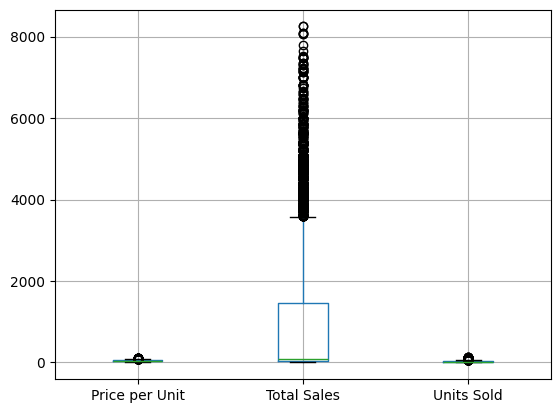

In [13]:
sales.boxplot(column=['Price per Unit', 'Total Sales', 'Units Sold'])
plt.show()

#### Ok, the scale is very different so lets do them separately using a for loop

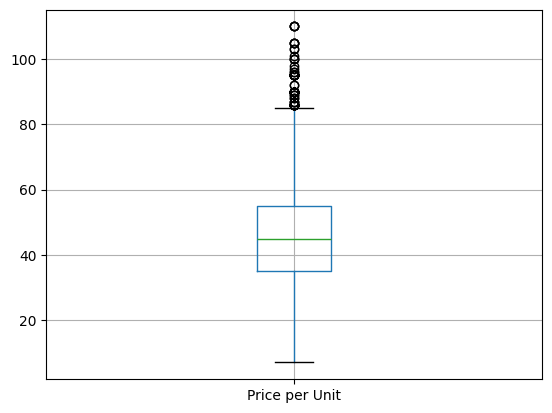

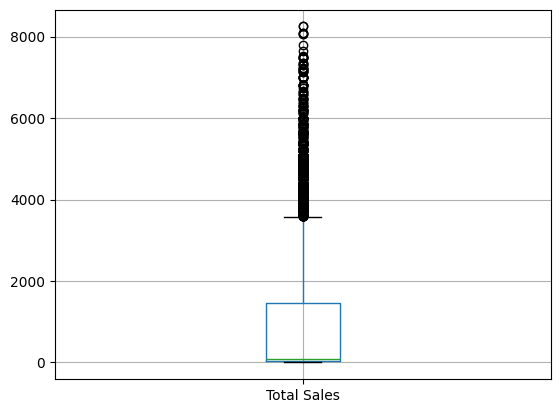

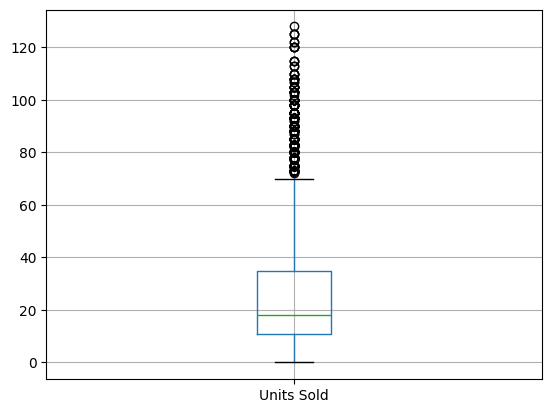

In [14]:
cols = ['Price per Unit', 'Total Sales', 'Units Sold']

for col in cols:
    sales.boxplot(column=[col])
    plt.show()

### Seems like Total Sales has the most outliers

### Now let's look at the outliers too

In [15]:
from IPython.display import display

for col in cols:
    Q1 = sales[col].quantile(0.25)
    Q3 = sales[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = sales[(sales[col] < Q1 - 1.5 * IQR) | (sales[col] > Q3 + 1.5 * IQR)]
    
    print(f"Outliers for column: {col}")
    display(outliers)

Outliers for column: Price per Unit


,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
679,2020-06-30,Women's Apparel,West,West Gear,In-store,Washington,100,6750,68
685,2020-07-06,Women's Apparel,West,West Gear,In-store,Washington,100,5750,58
708,2020-07-29,Men's Apparel,West,West Gear,In-store,Washington,90,3825,43
709,2020-07-30,Women's Apparel,West,West Gear,In-store,Washington,95,5225,55
714,2020-08-04,Men's Apparel,West,West Gear,In-store,Washington,90,4275,48
...,...,...,...,...,...,...,...,...,...
3370,2020-07-30,Women's Apparel,West,West Gear,Online,Washington,88,121,14
3375,2020-08-05,Women's Apparel,West,West Gear,Online,Washington,86,129,15
3376,2020-06-30,Women's Apparel,West,West Gear,Online,Washington,98,178,18
3379,2020-07-06,Women's Apparel,West,West Gear,Online,Washington,95,147,16


Outliers for column: Total Sales


,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,2020-01-01,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,2020-01-02,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,2020-01-03,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,2020-01-04,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,2020-01-05,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90
...,...,...,...,...,...,...,...,...,...
9082,2021-09-08,Women's Street Footwear,South,Sports Direct,Outlet,Alabama,45,4388,98
9084,2021-09-14,Women's Street Footwear,South,Sports Direct,Outlet,Alabama,55,5088,93
9085,2021-09-20,Women's Street Footwear,South,Sports Direct,Outlet,Alabama,60,3750,63
9086,2021-10-08,Women's Street Footwear,South,Sports Direct,Outlet,Alabama,65,4550,70


Outliers for column: Units Sold


,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,2020-01-01,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,2020-01-02,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,2020-01-03,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,2020-01-04,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,2020-01-05,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90
...,...,...,...,...,...,...,...,...,...
8985,2021-09-11,Women's Apparel,South,Sports Direct,Outlet,Alabama,60,4800,80
8986,2021-10-11,Women's Apparel,South,Sports Direct,Outlet,Alabama,70,5250,75
9001,2021-05-20,Women's Apparel,South,Sports Direct,Outlet,Tennessee,65,4875,75
9082,2021-09-08,Women's Street Footwear,South,Sports Direct,Outlet,Alabama,45,4388,98


### Will keep the outliers as they form part of the sales too

### 1.8 Correlation Analysis

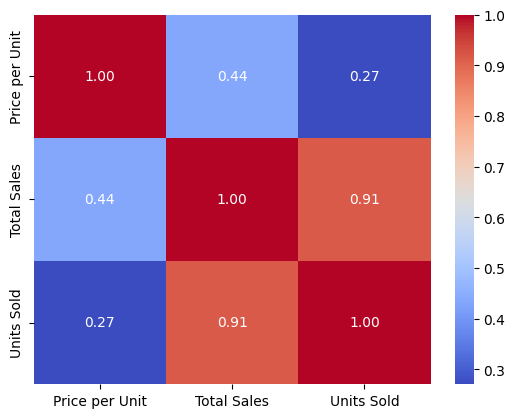

In [16]:
sns.heatmap(sales.corr(numeric_only = True),annot = True, fmt='.2f', cmap='coolwarm')
plt.show()

### Honestly, not much use for correlation analysis as we are not doing any modelling 

### 1.9 Grouped Analysis

In [17]:
sales.groupby('Product')['Total Sales'].mean()


Product
Men's Apparel                 764.539744
Men's Athletic Footwear       941.100000
Men's Street Footwear        1281.533333
Women's Apparel              1102.967949
Women's Athletic Footwear     656.345513
Women's Street Footwear       785.100000
Name: Total Sales, dtype: float64

In [18]:
sales.groupby('Product')['Total Sales'].max()

Product
Men's Apparel                6175
Men's Athletic Footwear      7125
Men's Street Footwear        8100
Women's Apparel              8250
Women's Athletic Footwear    5400
Women's Street Footwear      6650
Name: Total Sales, dtype: int64

In [19]:
sales.groupby('Region')['Total Sales'].mean()


Region
Midwest       725.504808
Northeast     784.271465
South         837.223380
Southeast    1333.158497
West         1078.330093
Name: Total Sales, dtype: float64

In [20]:
sales.groupby('Region')['Total Sales'].max()

Region
Midwest      6188
Northeast    7800
South        8250
Southeast    8250
West         7350
Name: Total Sales, dtype: int64

In [21]:
sales.groupby('Retailer')['Total Sales'].mean()

Retailer
Amazon            781.772783
Foot Locker       812.302554
Kohl's            991.481553
Sports Direct     892.245763
Walmart          1164.436426
West Gear        1023.501685
Name: Total Sales, dtype: float64

In [22]:
sales.groupby('Retailer')['Total Sales'].max()

Retailer
Amazon           6188
Foot Locker      7650
Kohl's           5200
Sports Direct    6988
Walmart          8250
West Gear        8250
Name: Total Sales, dtype: int64

In [23]:
sales.groupby(['Product']).size()

Product
Men's Apparel                1560
Men's Athletic Footwear      1560
Men's Street Footwear        1560
Women's Apparel              1560
Women's Athletic Footwear    1560
Women's Street Footwear      1560
dtype: int64

In [24]:
sales.groupby(['Region']).size()

Region
Midwest      1872
Northeast    2376
South        1728
Southeast    1224
West         2160
dtype: int64

In [25]:
sales.groupby(['Retailer']).size()

Retailer
Amazon            823
Foot Locker      2545
Kohl's           1030
Sports Direct    2006
Walmart           582
West Gear        2374
dtype: int64

### 1.10 Visual Summary

array([[<Axes: title={'center': 'Invoice Date'}>,
        <Axes: title={'center': 'Price per Unit'}>],
       [<Axes: title={'center': 'Total Sales'}>,
        <Axes: title={'center': 'Units Sold'}>]], dtype=object)

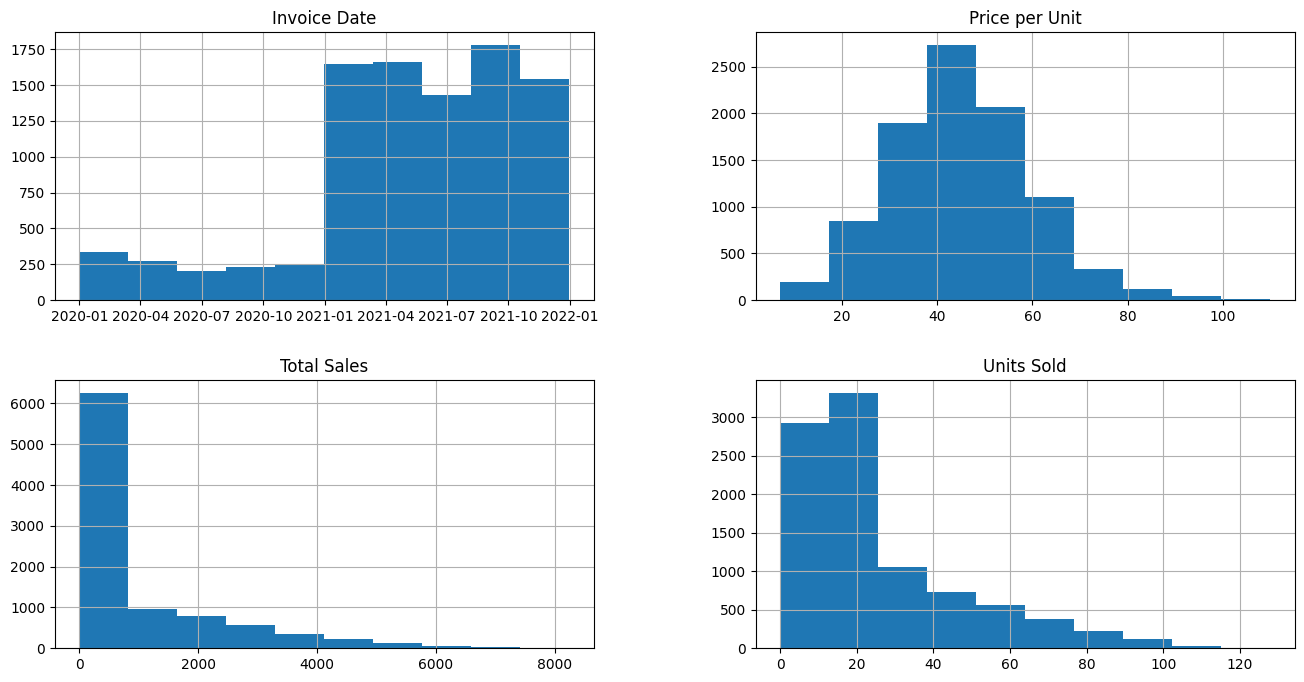

In [26]:
sales.hist(figsize=(16, 8))

In [27]:
sales.head()

,Invoice Date,Product,Region,Retailer,Sales Method,State,Price per Unit,Total Sales,Units Sold
0,2020-01-01,Men's Street Footwear,Northeast,Foot Locker,In-store,New York,50,6000,120
1,2020-01-02,Men's Athletic Footwear,Northeast,Foot Locker,In-store,New York,50,5000,100
2,2020-01-03,Women's Street Footwear,Northeast,Foot Locker,In-store,New York,40,4000,100
3,2020-01-04,Women's Athletic Footwear,Northeast,Foot Locker,In-store,New York,45,3825,85
4,2020-01-05,Men's Apparel,Northeast,Foot Locker,In-store,New York,60,5400,90


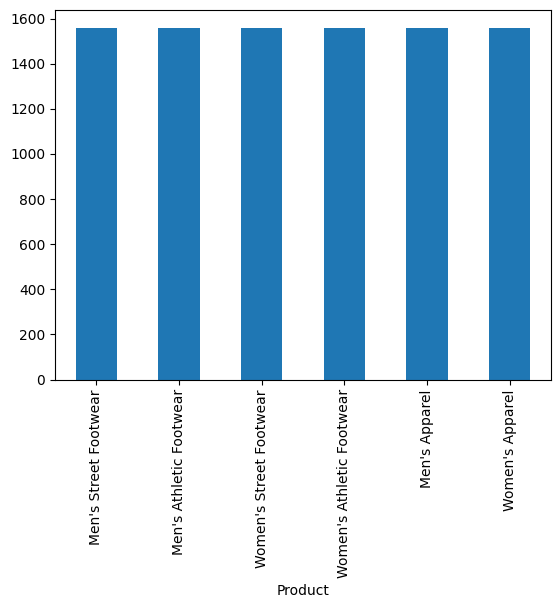

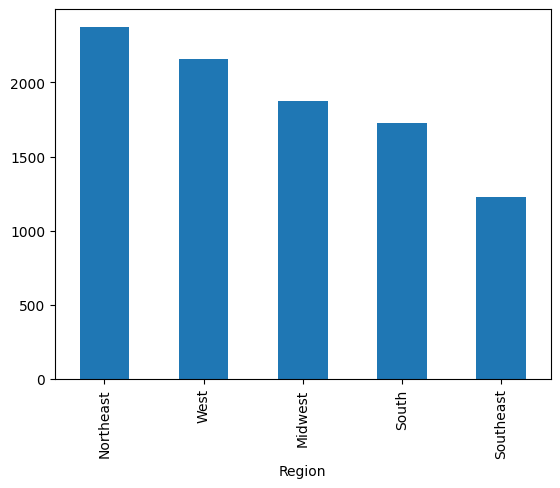

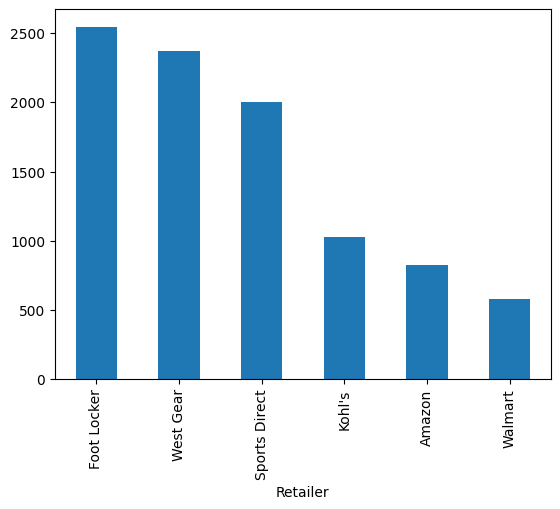

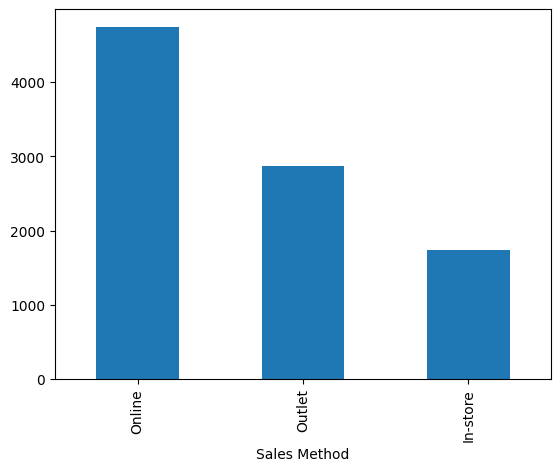

In [29]:
cols = ['Product', 'Region', 'Retailer', 'Sales Method']

for col in cols:
    sales[col].value_counts().plot(kind='bar')
    plt.show()
